# Phase 1: Setup and Data Loading

**Goal**: Load the Brisbane dataset and perform initial cleaning of the all-important price column.

This notebook covers:
1. Import required libraries
2. Load Brisbane dataset
3. Clean price column
4. Handle missing price values

## 1. Import Required Libraries

Import pandas, numpy, and matplotlib.pyplot for data manipulation and visualization.

In [1]:
# Import pandas, numpy, and matplotlib.pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Load Brisbane Dataset

Load the 'brisbane_listings.csv' file into a DataFrame and display the first 5 rows to inspect the data structure.

In [2]:
# using pandas, load the CSV file 'brisbane_listings.csv' into a DataFrame named df
# display the first 5 rows of the DataFrame to inspect it
df = pd.read_csv('brisbane_listings.csv')
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset shape: (5774, 79)

First 5 rows:


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,37380,https://www.airbnb.com/rooms/37380,20250804133915,2025-08-04,city scrape,Handy to Brisbane Airport,NaN,Wavell Heights is an older well established ne...,https://a0.muscache.com/pictures/airflow/Hosti...,161432,...,5.00,4.94,4.93,NaN,f,2,2,0,0,0.47
1,325029,https://www.airbnb.com/rooms/325029,20250804133915,2025-08-04,city scrape,Sunny Home - 2 Bed & Deck,Welcome to our cozy Sunny Home on a quiet West...,West End's renowned Boundary St is Brisbane's ...,https://a0.muscache.com/pictures/prohost-api/H...,1564865,...,4.95,4.91,4.81,NaN,f,2,2,0,0,1.78
2,458131,https://www.airbnb.com/rooms/458131,20250804133915,2025-08-04,previous scrape,Cat lovers needed! 2 bedroom house with cat!,"You will be sharing with our friendly, easy-c...",NaN,https://a0.muscache.com/pictures/6167586/ead8f...,654019,...,5.00,4.50,5.00,NaN,t,1,1,0,0,0.01
3,468726,https://www.airbnb.com/rooms/468726,20250804133915,2025-08-04,city scrape,"Near the city By the river Close to UQ, Milton",Our large air-con fully equipped two-bedroom a...,Guests at our Suncorp Stadium accommodation en...,https://a0.muscache.com/pictures/7ddb701c-a88b...,2318421,...,4.76,4.76,4.52,NaN,f,5,5,0,0,0.15
4,469007,https://www.airbnb.com/rooms/469007,20250804133915,2025-08-04,city scrape,Nice Room in Large Homely Residence,NaN,NaN,https://a0.muscache.com/pictures/7102919/034d3...,2328120,...,4.98,4.76,4.80,NaN,f,1,0,1,0,0.35


## 3. Clean Price Column

Clean the 'price' column by removing '$' and ',' characters and converting the values to float data type.

In [3]:
# The 'price' column is a string with '$' and ','. 
# Clean the 'price' column by removing these characters and converting it to a float.

# First, let's examine the price column
print("Sample price values before cleaning:")
print(df['price'].head(10))
print(f"\nPrice column data type: {df['price'].dtype}")

# Clean the price column by removing '$' and ',' and converting to float
df['price'] = df['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

print("\nSample price values after cleaning:")
print(df['price'].head(10))
print(f"\nPrice column data type after cleaning: {df['price'].dtype}")

Sample price values before cleaning:
0    $202.00
1    $279.00
2        NaN
3    $251.00
4     $51.00
5    $266.00
6        NaN
7     $41.00
8    $229.00
9    $300.00
Name: price, dtype: object

Price column data type: object

Sample price values after cleaning:
0    202.0
1    279.0
2      NaN
3    251.0
4     51.0
5    266.0
6      NaN
7     41.0
8    229.0
9    300.0
Name: price, dtype: float64

Price column data type after cleaning: float64


## 4. Handle Missing Price Values

Check for missing values in the cleaned 'price' column and drop rows where price data is missing.

In [4]:
# Check for and count any missing values in the cleaned 'price' column
# Drop all rows from df where the 'price' column has a missing value

print("Dataset shape before removing missing prices:", df.shape)
print(f"Number of missing values in price column: {df['price'].isnull().sum()}")
print(f"Percentage of missing values: {(df['price'].isnull().sum() / len(df)) * 100:.2f}%")

# Drop rows with missing prices
df = df.dropna(subset=['price'])

print(f"\nDataset shape after removing missing prices: {df.shape}")
print(f"Number of rows removed: {df.shape[0] - (df.shape[0] + df['price'].isnull().sum())}")

# Display summary statistics of the cleaned price column
print(f"\nPrice column summary statistics:")
print(df['price'].describe())

Dataset shape before removing missing prices: (5774, 79)
Number of missing values in price column: 622
Percentage of missing values: 10.77%

Dataset shape after removing missing prices: (5152, 79)
Number of rows removed: 0

Price column summary statistics:
count    5152.000000
mean      241.431677
std       251.831940
min        16.000000
25%       130.000000
50%       200.000000
75%       279.000000
max      5916.000000
Name: price, dtype: float64


# Phase 2: Target Variable Transformation

**Goal**: Correct the skewed price distribution to help the model learn more effectively. This is a critical step for good performance.

This phase covers:
1. Visualize the original price distribution
2. Apply log transformation to reduce skewness
3. Visualize the transformed distribution

## 5. Visualize Original Price Distribution

Plot a histogram of the original price distribution to observe the skewness.

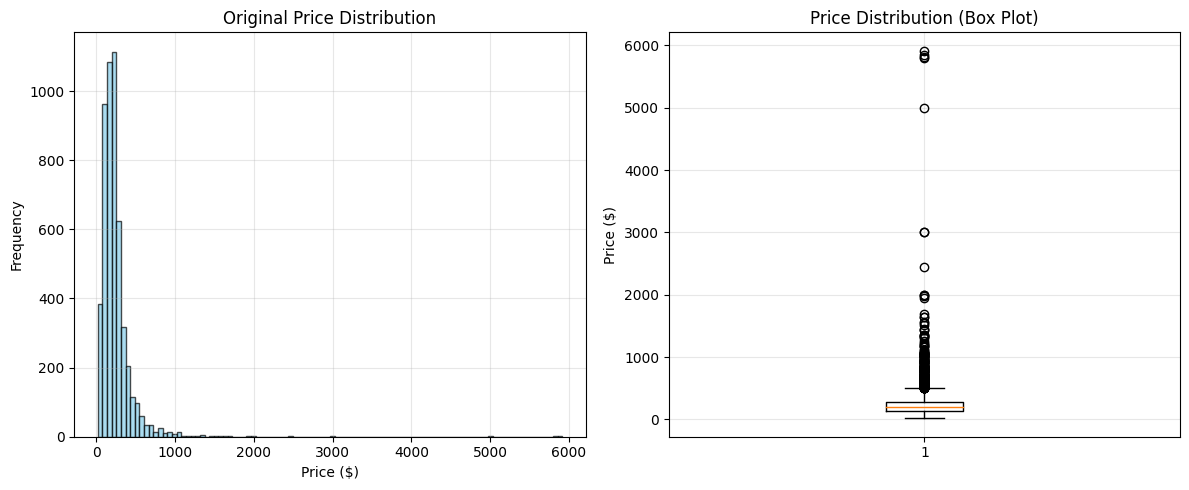

Price distribution statistics:
Mean: $241.43
Median: $200.00
Skewness: 11.57


In [5]:
# using matplotlib, plot a histogram of the 'price' column with 100 bins to see its distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=100, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Original Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['price'], vert=True)
plt.title('Price Distribution (Box Plot)')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Price distribution statistics:")
print(f"Mean: ${df['price'].mean():.2f}")
print(f"Median: ${df['price'].median():.2f}")
print(f"Skewness: {df['price'].skew():.2f}")  # Positive values indicate right skew

## 6. Apply Log Transformation

Create a log-transformed version of the price column to reduce skewness and improve model performance.

In [6]:
# The price is skewed. Create a new column 'price_log' in the DataFrame.
# This new column should be the log1p transformation of the 'price' column using numpy.

# Apply log1p transformation (log(1 + x)) which handles zero values better than log(x)
df['price_log'] = np.log1p(df['price'])

print("Log transformation applied successfully!")
print(f"\nComparison of original and log-transformed prices:")
print("Original prices (first 10):")
print(df['price'].head(10).values)
print("\nLog-transformed prices (first 10):")
print(df['price_log'].head(10).values)

print(f"\nLog-transformed price statistics:")
print(f"Mean: {df['price_log'].mean():.4f}")
print(f"Median: {df['price_log'].median():.4f}")
print(f"Skewness: {df['price_log'].skew():.4f}")  # Should be closer to 0

Log transformation applied successfully!

Comparison of original and log-transformed prices:
Original prices (first 10):
[202. 279. 251.  51. 266.  41. 229. 300.  77.  90.]

Log-transformed prices (first 10):
[5.31320598 5.6347896  5.52942909 3.95124372 5.58724866 3.73766962
 5.43807931 5.70711026 4.35670883 4.51085951]

Log-transformed price statistics:
Mean: 5.2698
Median: 5.3033
Skewness: 0.2673


## 7. Visualize Transformed Distribution

Compare the original and log-transformed price distributions to confirm the transformation improved normality.

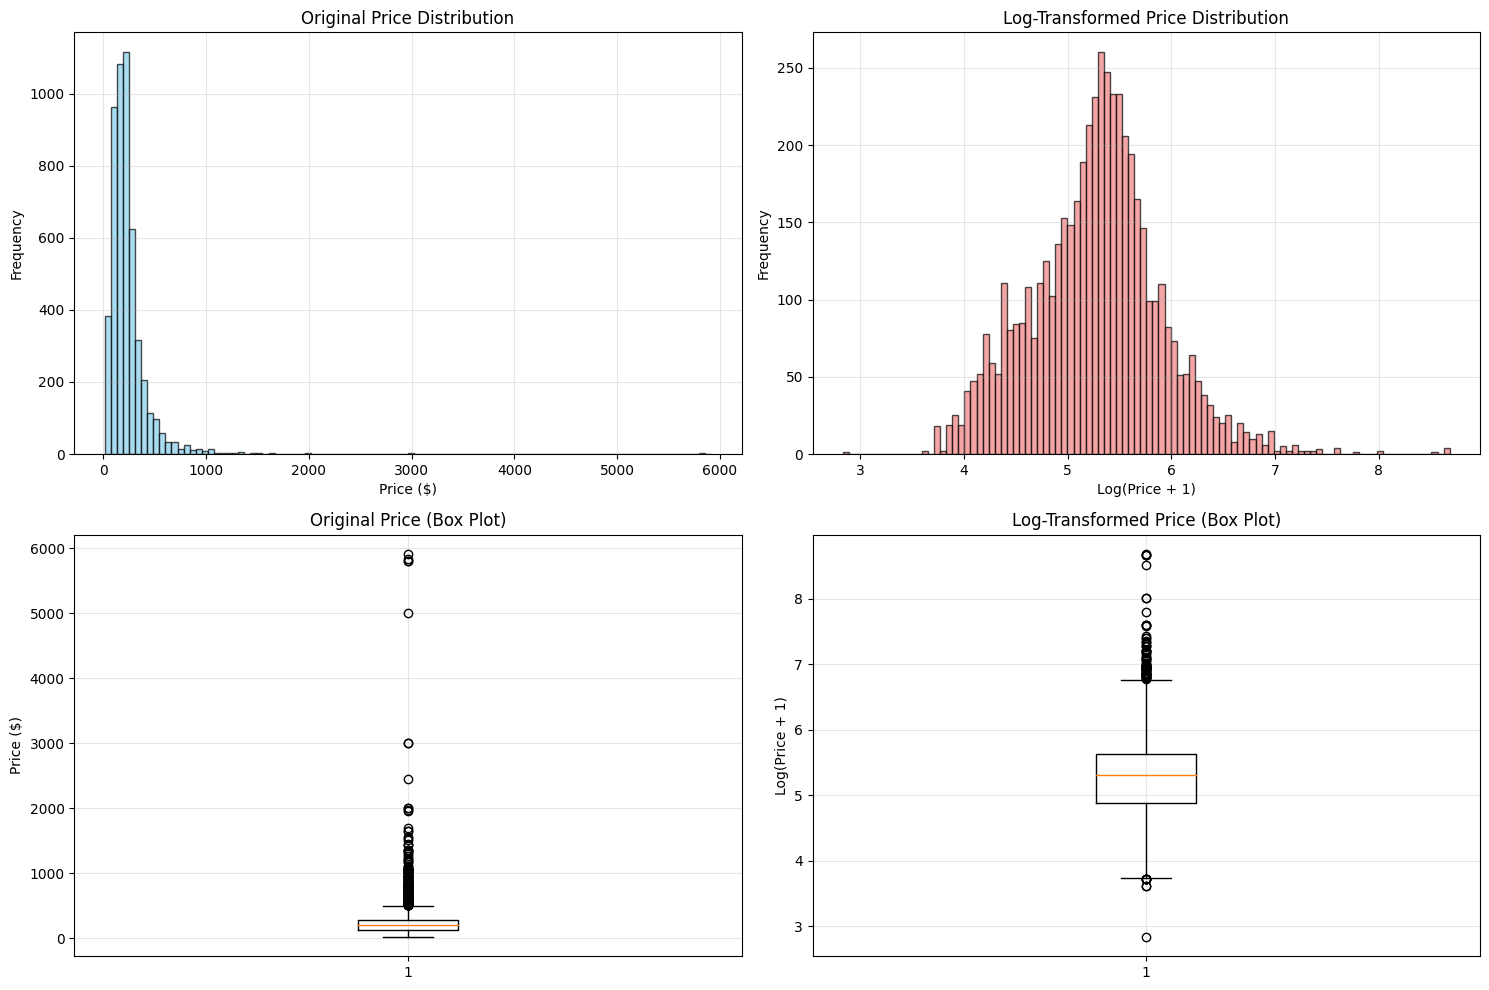

Distribution Comparison:
Original Price - Skewness: 11.5651
Log-Transformed Price - Skewness: 0.2673

Improvement: The log transformation reduced skewness by 11.2978
A skewness closer to 0 indicates a more normal distribution, which is better for model training.


In [7]:
# Plot a histogram of the 'price_log' column to confirm its distribution is now more normal
plt.figure(figsize=(15, 10))

# Original price distribution
plt.subplot(2, 2, 1)
plt.hist(df['price'], bins=100, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Original Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Log-transformed price distribution
plt.subplot(2, 2, 2)
plt.hist(df['price_log'], bins=100, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Original price box plot
plt.subplot(2, 2, 3)
plt.boxplot(df['price'], vert=True)
plt.title('Original Price (Box Plot)')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)

# Log-transformed price box plot
plt.subplot(2, 2, 4)
plt.boxplot(df['price_log'], vert=True)
plt.title('Log-Transformed Price (Box Plot)')
plt.ylabel('Log(Price + 1)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary comparison
print("Distribution Comparison:")
print(f"Original Price - Skewness: {df['price'].skew():.4f}")
print(f"Log-Transformed Price - Skewness: {df['price_log'].skew():.4f}")
print(f"\nImprovement: The log transformation reduced skewness by {abs(df['price'].skew() - df['price_log'].skew()):.4f}")
print("A skewness closer to 0 indicates a more normal distribution, which is better for model training.")

# Phase 3: Feature Engineering

**Goal**: Convert the raw data into a clean, numerical feature matrix (X) that the GNN can understand.

This phase covers:
1. Select numerical and categorical feature columns
2. Handle missing values in numerical features
3. One-hot encode categorical features
4. Combine and scale all features into a final feature matrix

## 8. Select Feature Columns

First, let's explore the dataset to identify which columns are available and suitable for modeling.

In [8]:
# First, let's explore the available columns in our dataset
print("Available columns in the dataset:")
print(df.columns.tolist())
print(f"\nDataset shape: {df.shape}")

# Display basic info about each column
print("\nColumn information:")
df.info()

# Create a list of numerical feature names to use, for example: 
# ['accommodates', 'bedrooms', 'bathrooms', 'beds', 'review_scores_rating']
numerical_features = ['accommodates', 'bedrooms', 'bathrooms', 'beds', 'review_scores_rating']

# Create a list of categorical feature names to use, for example: ['room_type']
categorical_features = ['room_type']

print(f"\nSelected numerical features: {numerical_features}")
print(f"Selected categorical features: {categorical_features}")

# Check if all selected features exist in the dataset
all_features = numerical_features + categorical_features
missing_features = [feat for feat in all_features if feat not in df.columns]
if missing_features:
    print(f"\nWARNING: These features are not in the dataset: {missing_features}")
    # Remove missing features from our lists
    numerical_features = [feat for feat in numerical_features if feat in df.columns]
    categorical_features = [feat for feat in categorical_features if feat in df.columns]
    print(f"Updated numerical features: {numerical_features}")
    print(f"Updated categorical features: {categorical_features}")
else:
    print("\nAll selected features are available in the dataset!")

Available columns in the dataset:
['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_

## 9. Handle Missing Feature Values

Clean the numerical features by filling missing values with median values.

In [9]:
# For each column in the numerical_features list, fill any missing values with the column's median

# First, let's check for missing values in our selected features
print("Missing values in numerical features:")
for feature in numerical_features:
    missing_count = df[feature].isnull().sum()
    missing_pct = (missing_count / len(df)) * 100
    print(f"{feature}: {missing_count} ({missing_pct:.2f}%)")

print("\nMissing values in categorical features:")
for feature in categorical_features:
    missing_count = df[feature].isnull().sum()
    missing_pct = (missing_count / len(df)) * 100
    print(f"{feature}: {missing_count} ({missing_pct:.2f}%)")

# Create a copy of the selected numerical features for processing
numerical_df = df[numerical_features].copy()

# Fill missing values with median for each numerical feature
print(f"\nFilling missing values with median...")
for feature in numerical_features:
    median_value = numerical_df[feature].median()
    original_missing = numerical_df[feature].isnull().sum()
    numerical_df[feature] = numerical_df[feature].fillna(median_value)
    
    if original_missing > 0:
        print(f"{feature}: Filled {original_missing} missing values with median {median_value:.2f}")
    else:
        print(f"{feature}: No missing values found")

print(f"\nNumerical features shape after cleaning: {numerical_df.shape}")
print("First 5 rows of cleaned numerical features:")
print(numerical_df.head())

Missing values in numerical features:
accommodates: 0 (0.00%)
bedrooms: 3 (0.06%)
bathrooms: 7 (0.14%)
beds: 3 (0.06%)
review_scores_rating: 556 (10.79%)

Missing values in categorical features:
room_type: 0 (0.00%)

Filling missing values with median...
accommodates: No missing values found
bedrooms: Filled 3 missing values with median 1.00
bathrooms: Filled 7 missing values with median 1.00
beds: Filled 3 missing values with median 2.00
review_scores_rating: Filled 556 missing values with median 4.82

Numerical features shape after cleaning: (5152, 5)
First 5 rows of cleaned numerical features:
   accommodates  bedrooms  bathrooms  beds  review_scores_rating
0             4       2.0        1.0   5.0                  4.92
1             3       2.0        1.0   2.0                  4.81
3             5       2.0        0.0   3.0                  4.54
4             2       1.0        1.0   1.0                  4.78
5             6       3.0        2.0   4.0                  4.57


## 10. One-Hot Encode Categorical Features

Convert categorical features into numerical format using one-hot encoding.

In [10]:
# Use pandas get_dummies to one-hot encode the categorical features. Store the result in a new DataFrame.

# First, let's examine the categorical features
print("Categorical features analysis:")
for feature in categorical_features:
    print(f"\n{feature}:")
    value_counts = df[feature].value_counts()
    print(f"  Unique values: {df[feature].nunique()}")
    print(f"  Missing values: {df[feature].isnull().sum()}")
    print(f"  Top 5 values:")
    print(value_counts.head())

# Create a copy of the categorical features for processing
categorical_df = df[categorical_features].copy()

# Handle missing values in categorical features (fill with mode/most frequent value)
for feature in categorical_features:
    if categorical_df[feature].isnull().sum() > 0:
        mode_value = categorical_df[feature].mode()[0] if len(categorical_df[feature].mode()) > 0 else 'Unknown'
        missing_count = categorical_df[feature].isnull().sum()
        categorical_df[feature] = categorical_df[feature].fillna(mode_value)
        print(f"\nFilled {missing_count} missing values in {feature} with mode: {mode_value}")

# Apply one-hot encoding
print(f"\nApplying one-hot encoding to categorical features...")
categorical_encoded = pd.get_dummies(categorical_df, prefix=categorical_features, drop_first=True)

print(f"Original categorical features shape: {categorical_df.shape}")
print(f"One-hot encoded features shape: {categorical_encoded.shape}")
print(f"New categorical feature columns: {list(categorical_encoded.columns)}")

print("\nFirst 5 rows of one-hot encoded categorical features:")
print(categorical_encoded.head())

Categorical features analysis:

room_type:
  Unique values: 4
  Missing values: 0
  Top 5 values:
room_type
Entire home/apt    3904
Private room       1236
Hotel room            6
Shared room           6
Name: count, dtype: int64

Applying one-hot encoding to categorical features...
Original categorical features shape: (5152, 1)
One-hot encoded features shape: (5152, 3)
New categorical feature columns: ['room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room']

First 5 rows of one-hot encoded categorical features:
   room_type_Hotel room  room_type_Private room  room_type_Shared room
0                 False                   False                  False
1                 False                   False                  False
3                 False                   False                  False
4                 False                    True                  False
5                 False                   False                  False


## 11. Combine and Scale All Features

Combine the cleaned numerical and encoded categorical features, then apply standard scaling.

In [11]:
# Combine the cleaned numerical features and the one-hot encoded dummy features into a single feature DataFrame.
# Import StandardScaler from scikit-learn.
# Create a scaler object and use it to scale the combined feature DataFrame.

from sklearn.preprocessing import StandardScaler

# Combine numerical and categorical features
print("Combining features...")
print(f"Numerical features shape: {numerical_df.shape}")
print(f"Categorical encoded features shape: {categorical_encoded.shape}")

# Ensure both dataframes have the same index
numerical_df = numerical_df.reset_index(drop=True)
categorical_encoded = categorical_encoded.reset_index(drop=True)

# Combine features horizontally
combined_features = pd.concat([numerical_df, categorical_encoded], axis=1)

print(f"Combined features shape: {combined_features.shape}")
print(f"Combined feature columns: {list(combined_features.columns)}")

# Check for any remaining missing values
missing_values = combined_features.isnull().sum().sum()
print(f"Total missing values in combined features: {missing_values}")

if missing_values > 0:
    print("WARNING: There are still missing values in the combined features!")
    print("Missing values by column:")
    print(combined_features.isnull().sum()[combined_features.isnull().sum() > 0])

# Create and apply StandardScaler
print(f"\nApplying StandardScaler to all features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(combined_features)

# Convert back to DataFrame for easier handling
X_final = pd.DataFrame(X_scaled, columns=combined_features.columns)

print(f"Final feature matrix shape: {X_final.shape}")
print(f"Feature scaling complete!")

# Display summary statistics of scaled features
print(f"\nScaled features summary (first 5 columns):")
print(X_final.iloc[:, :5].describe())

print(f"\nFirst 5 rows of final feature matrix:")
print(X_final.head())

Combining features...
Numerical features shape: (5152, 5)
Categorical encoded features shape: (5152, 3)
Combined features shape: (5152, 8)
Combined feature columns: ['accommodates', 'bedrooms', 'bathrooms', 'beds', 'review_scores_rating', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room']
Total missing values in combined features: 0

Applying StandardScaler to all features...
Final feature matrix shape: (5152, 8)
Feature scaling complete!

Scaled features summary (first 5 columns):
       accommodates      bedrooms     bathrooms          beds  \
count  5.152000e+03  5.152000e+03  5.152000e+03  5.152000e+03   
mean  -3.861645e-17  4.964973e-17  1.117119e-16  1.103327e-17   
std    1.000097e+00  1.000097e+00  1.000097e+00  1.000097e+00   
min   -1.168692e+00 -1.565057e+00 -1.981208e+00 -1.316661e+00   
25%   -7.330746e-01 -6.655510e-01 -5.802768e-01 -6.931833e-01   
50%   -2.974575e-01 -6.655510e-01 -5.802768e-01 -6.970559e-02   
75%    1.381596e-01  2.339555e-01 

## 12. Feature Engineering Summary

Let's create a summary of our feature engineering process and prepare our final variables.

In [12]:
# Final summary of our feature engineering process

print("=" * 60)
print("FEATURE ENGINEERING SUMMARY")
print("=" * 60)

print(f"Original dataset shape: {df.shape}")
print(f"Final feature matrix (X) shape: {X_final.shape}")
print(f"Target variable (y) available: price_log")

print(f"\nFeature breakdown:")
print(f"  • Original numerical features: {len(numerical_features)} ({', '.join(numerical_features)})")
print(f"  • Original categorical features: {len(categorical_features)} ({', '.join(categorical_features)})")
print(f"  • One-hot encoded categorical features: {categorical_encoded.shape[1]}")
print(f"  • Total final features: {X_final.shape[1]}")

print(f"\nProcessing steps completed:")
print(f"  ✓ Selected {len(numerical_features + categorical_features)} relevant features")
print(f"  ✓ Handled missing values (median imputation for numerical)")
print(f"  ✓ One-hot encoded categorical variables")
print(f"  ✓ Combined all features into single matrix")
print(f"  ✓ Applied StandardScaler for normalization")

print(f"\nKey variables for modeling:")
print(f"  • X_final: Scaled feature matrix {X_final.shape}")
print(f"  • df['price_log']: Log-transformed target variable {df['price_log'].shape}")
print(f"  • scaler: Fitted StandardScaler object for future use")

print(f"\nData is now ready for GNN modeling!")
print("=" * 60)

FEATURE ENGINEERING SUMMARY
Original dataset shape: (5152, 80)
Final feature matrix (X) shape: (5152, 8)
Target variable (y) available: price_log

Feature breakdown:
  • Original numerical features: 5 (accommodates, bedrooms, bathrooms, beds, review_scores_rating)
  • Original categorical features: 1 (room_type)
  • One-hot encoded categorical features: 3
  • Total final features: 8

Processing steps completed:
  ✓ Selected 6 relevant features
  ✓ Handled missing values (median imputation for numerical)
  ✓ One-hot encoded categorical variables
  ✓ Combined all features into single matrix
  ✓ Applied StandardScaler for normalization

Key variables for modeling:
  • X_final: Scaled feature matrix (5152, 8)
  • df['price_log']: Log-transformed target variable (5152,)
  • scaler: Fitted StandardScaler object for future use

Data is now ready for GNN modeling!
